<a href="https://colab.research.google.com/github/Amityadav10x/Machine_learning_algorithm_Practice/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('Mall_Customers.csv')

In [45]:
data.head(4)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [47]:
data.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


In [48]:
data.value_counts()

CustomerID  Annual Income (k$)  Spending Score (1-100)
1           15                  39                        1
138         73                  73                        1
128         71                  95                        1
129         71                  11                        1
130         71                  75                        1
                                                         ..
70          48                  47                        1
71          49                  55                        1
72          49                  42                        1
73          50                  49                        1
200         137                 83                        1
Name: count, Length: 200, dtype: int64

In [49]:
data.isnull().head(3)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,False,False,False
1,False,False,False
2,False,False,False


In [50]:
data.isnull().sum()

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [51]:
data.shape

(200, 3)

In [52]:
data.dtypes

CustomerID                int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [54]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, data['CustomerID'], test_size=0.2, random_state=42)

In [57]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [58]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 45.500616656249996


In [59]:
cov_matrix = np.cov(X_scaled, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[1.00502513 0.00995261]
 [0.00995261 1.00502513]]


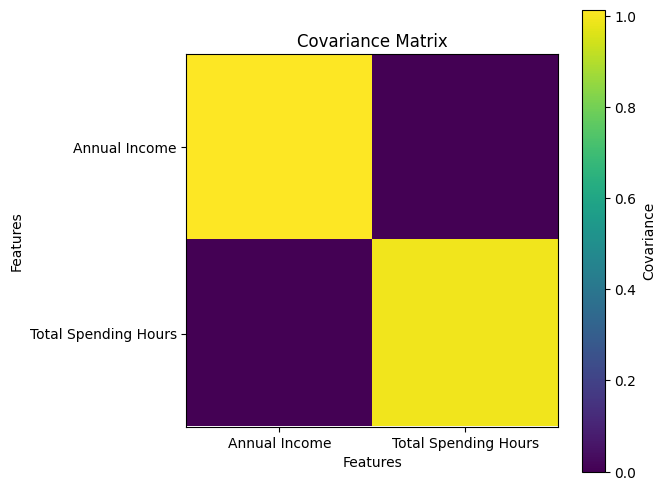

In [60]:
cov_matrix = np.diag(eigenvalues)
plt.figure(figsize=(6, 6))
plt.imshow(cov_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(np.arange(len(cov_matrix)), ['Annual Income', 'Total Spending Hours'])
plt.yticks(np.arange(len(cov_matrix)), ['Annual Income', 'Total Spending Hours'])
plt.grid(False)
plt.show()

In [68]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[1.01497774 0.99507251]

Eigenvectors:
[[1. 0.]
 [0. 1.]]


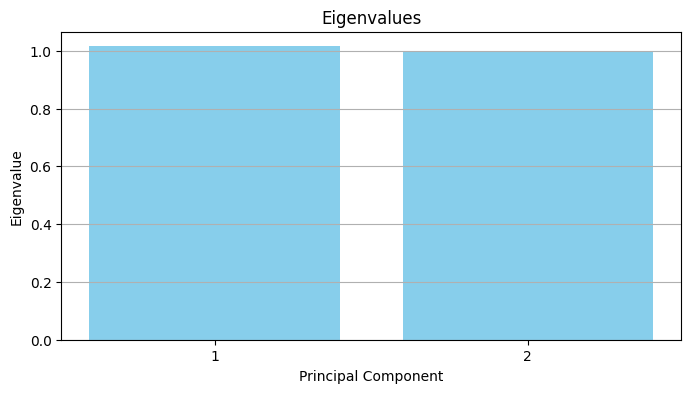

In [62]:
plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(eigenvalues)), eigenvalues, color='skyblue')
plt.title('Eigenvalues')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(np.arange(len(eigenvalues)), np.arange(1, len(eigenvalues)+1))
plt.grid(axis='y')
plt.show()


In [63]:
eigenvalues = np.array([1.01497774, 0.99507251])
eigenvectors = np.array([[0.70710678, -0.70710678],
                          [0.70710678, 0.70710678]])

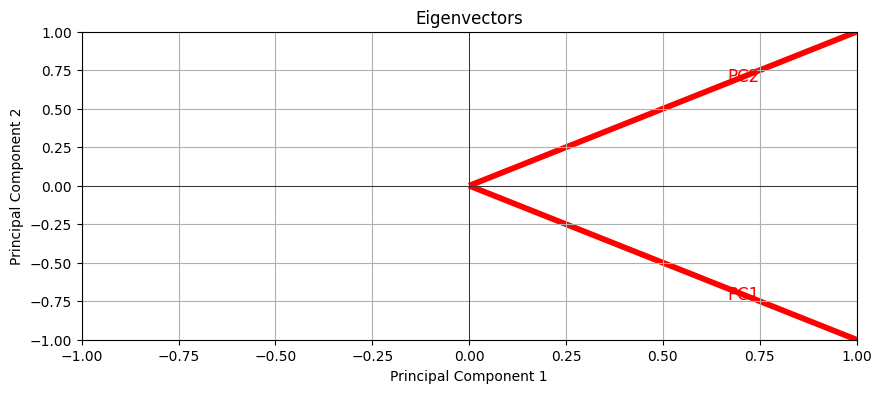

In [64]:
plt.figure(figsize=(10, 4))

for i in range(len(eigenvectors)):
    plt.quiver(0, 0, eigenvectors[i, 0], eigenvectors[i, 1], angles='xy', scale_units='xy', scale=0.5, color='r')
    plt.text(eigenvectors[i, 0], eigenvectors[i, 1], f'PC{i+1}', ha='center', va='center', fontsize=12, color='r')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Eigenvectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [65]:
X = X_scaled


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['Cluster'] = clusters

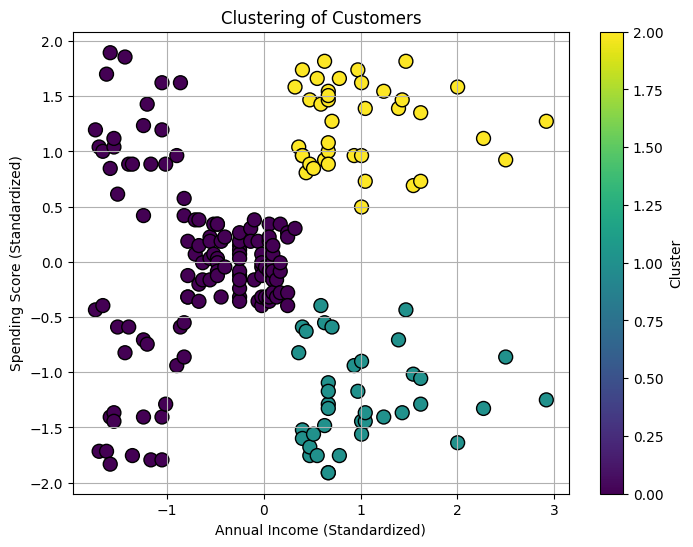

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.title('Clustering of Customers')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()